## Etapa 1: Carga dos Dados e Entendimento Inicial

Célula 1: Importar Bibliotecas e Carregar o Dataset

In [2]:
# Importar a biblioteca pandas
import pandas as pd

# Carregar o dataset
try:
    df = pd.read_csv('Clean_Dataset.csv')
    print("Dataset 'Clean_Dataset.csv' carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'Clean_Dataset.csv' não foi encontrado.")

Dataset 'Clean_Dataset.csv' carregado com sucesso!


Célula 2: Visualizar as Primeiras Linhas

In [3]:
print("Primeiras 5 linhas do dataset:")
df.head()

Primeiras 5 linhas do dataset:


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Célula 3: Informações Gerais do Dataset

In [4]:
print("Informações gerais do dataset:")
df.info()

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Célula 4: Estatísticas Descritivas

In [5]:
print("Estatísticas descritivas das colunas numéricas:")
df.describe()

Estatísticas descritivas das colunas numéricas:


,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


## Etapa 2: Análise Exploratória dos Dados (EDA) e Limpeza/Preparação Inicial

Célula 5: Remover a coluna 'Unnamed: 0'

In [6]:
# Remover a coluna 'Unnamed: 0' que parece ser um índice desnecessário
df = df.drop('Unnamed: 0', axis=1)
print("Coluna 'Unnamed: 0' removida com sucesso.")
print("\nNovas 5 primeiras linhas do dataset após remoção:")
df.head()

Coluna 'Unnamed: 0' removida com sucesso.

Novas 5 primeiras linhas do dataset após remoção:


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Célula 6: Análise da Distribuição da Variável Alvo (price)

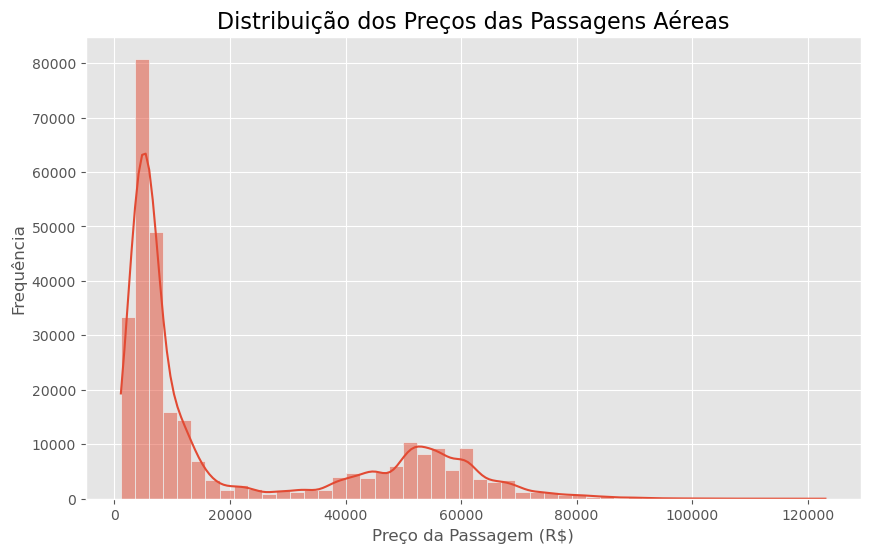


Estatísticas da coluna 'price':
count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar a visualização dos gráficos (opcional, mas recomendado)
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Histograma da variável 'price'
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribuição dos Preços das Passagens Aéreas', fontsize=16)
plt.xlabel('Preço da Passagem (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()

# Calcular algumas estatísticas para a variável 'price'
print("\nEstatísticas da coluna 'price':")
print(df['price'].describe())

## Etapa 2: Análise Exploratória dos Dados (EDA)

A) O preço varia com as companhias aéreas?

Célula 7: Preço vs. Companhia Aérea (airline)

C:\Users\Guilh\AppData\Local\Temp\ipykernel_17060\230612891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='airline', y='price', data=df, palette='viridis')


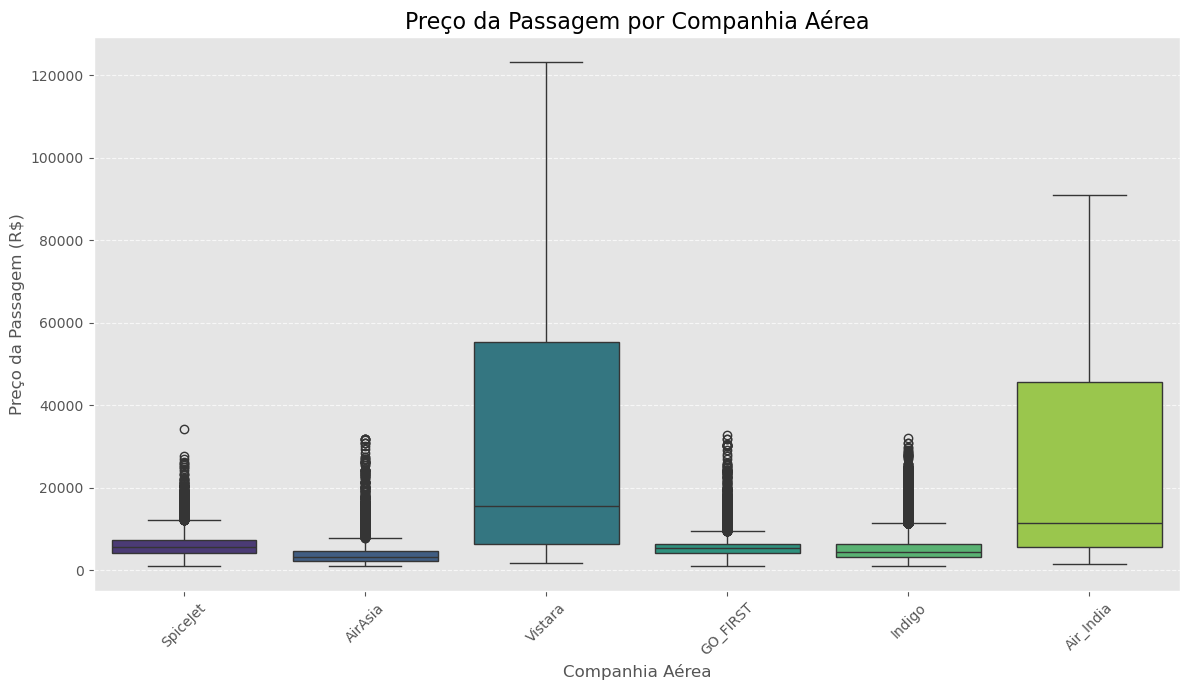


Média do preço por Companhia Aérea:
airline
Vistara      30396.536302
Air_India    23507.019112
SpiceJet      6179.278881
GO_FIRST      5652.007595
Indigo        5324.216303
AirAsia       4091.072742
Name: price, dtype: float64

Mediana do preço por Companhia Aérea:
airline
Vistara      15543.0
Air_India    11520.0
SpiceJet      5654.0
GO_FIRST      5336.0
Indigo        4453.0
AirAsia       3276.0
Name: price, dtype: float64


In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='airline', y='price', data=df, palette='viridis')
plt.title('Preço da Passagem por Companhia Aérea', fontsize=16)
plt.xlabel('Companhia Aérea', fontsize=12)
plt.ylabel('Preço da Passagem (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Ver a média e a mediana do preço por companhia aérea
print("\nMédia do preço por Companhia Aérea:")
print(df.groupby('airline')['price'].mean().sort_values(ascending=False))

print("\nMediana do preço por Companhia Aérea:")
print(df.groupby('airline')['price'].median().sort_values(ascending=False))

B) Como é afetado o preço quando os bilhetes são comprados apenas 1 ou 2 dias antes da partida?

Célula 8: Preço vs. Dias Restantes (days_left)

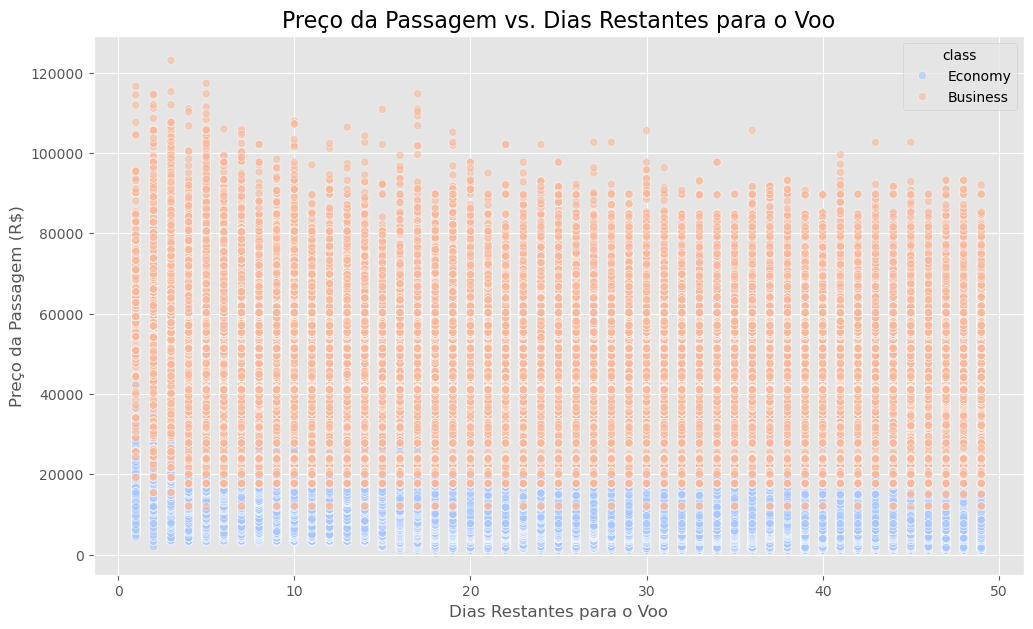


Média e Mediana do preço para passagens compradas com poucos dias restantes:
count     20670.000000
mean      27132.161103
std       23724.297912
min        1977.000000
25%       10480.000000
50%       14744.000000
75%       47714.000000
max      123071.000000
Name: price, dtype: float64


In [10]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='days_left', y='price', data=df, alpha=0.6, hue='class', palette='coolwarm')
plt.title('Preço da Passagem vs. Dias Restantes para o Voo', fontsize=16)
plt.xlabel('Dias Restantes para o Voo', fontsize=12)
plt.ylabel('Preço da Passagem (R$)', fontsize=12)
plt.grid(True)
plt.show()

# Vamos analisar mais de perto os preços para poucos dias restantes
print("\nMédia e Mediana do preço para passagens compradas com poucos dias restantes:")
print(df[df['days_left'] <= 5]['price'].describe()) # Pegando os 5 últimos dias como 'poucos dias'

C) O preço do bilhete muda com base no horário de partida e no horário de chegada?

Célula 9: Preço vs. Horário de Partida (departure_time)

C:\Users\Guilh\AppData\Local\Temp\ipykernel_17060\317054132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='departure_time', y='price', data=df, palette='plasma', order=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])


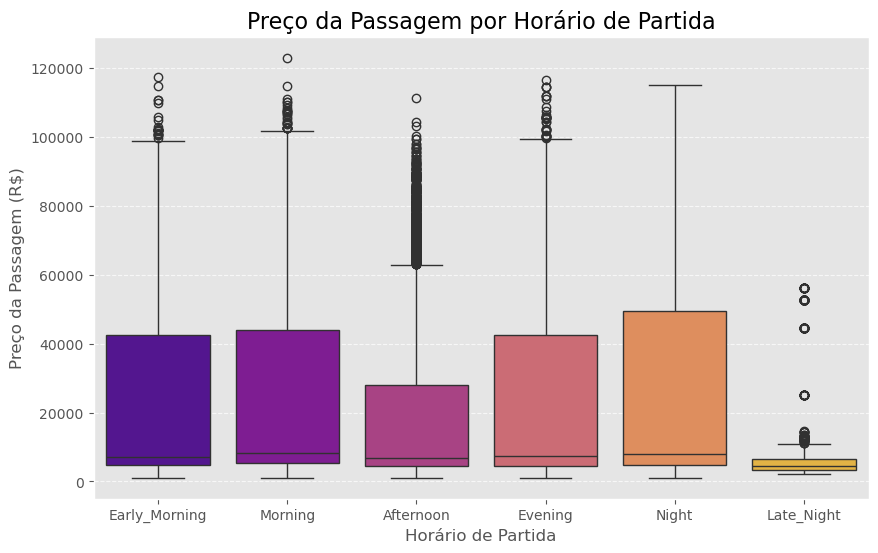


Média do preço por Horário de Partida:
departure_time
Night            23062.146808
Morning          21630.760254
Evening          21232.361894
Early_Morning    20370.676718
Afternoon        18179.203331
Late_Night        9295.299387
Name: price, dtype: float64


In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='departure_time', y='price', data=df, palette='plasma', order=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
plt.title('Preço da Passagem por Horário de Partida', fontsize=16)
plt.xlabel('Horário de Partida', fontsize=12)
plt.ylabel('Preço da Passagem (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nMédia do preço por Horário de Partida:")
print(df.groupby('departure_time')['price'].mean().sort_values(ascending=False))

Célula 10: Preço vs. Horário de Chegada (arrival_time)

C:\Users\Guilh\AppData\Local\Temp\ipykernel_17060\2256029027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arrival_time', y='price', data=df, palette='magma', order=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])


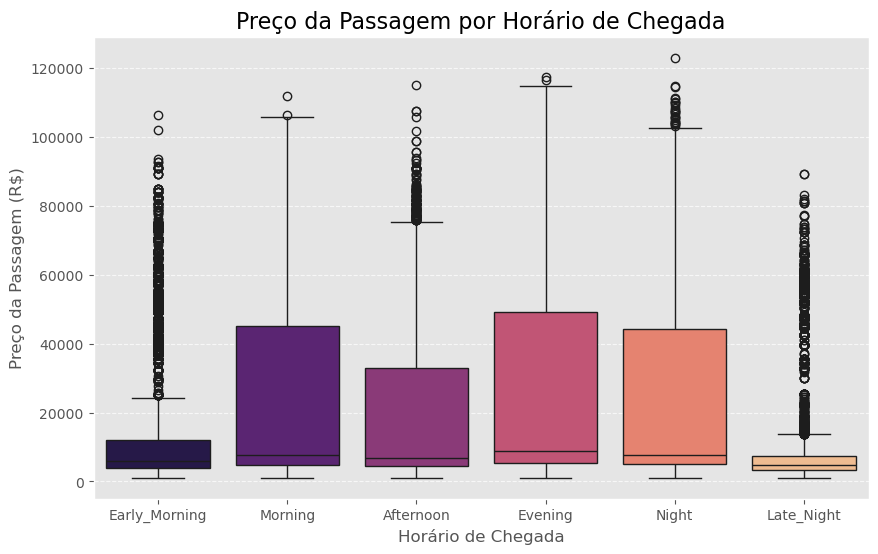


Média do preço por Horário de Chegada:
arrival_time
Evening          23044.371615
Morning          22231.076098
Night            21586.758341
Afternoon        18494.598993
Early_Morning    14993.139521
Late_Night       11284.906078
Name: price, dtype: float64


In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='arrival_time', y='price', data=df, palette='magma', order=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
plt.title('Preço da Passagem por Horário de Chegada', fontsize=16)
plt.xlabel('Horário de Chegada', fontsize=12)
plt.ylabel('Preço da Passagem (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nMédia do preço por Horário de Chegada:")
print(df.groupby('arrival_time')['price'].mean().sort_values(ascending=False))

D) Como o preço muda com a mudança de Origem e Destino?

Célula 11: Preço vs. Cidade de Origem (source_city)

C:\Users\Guilh\AppData\Local\Temp\ipykernel_17060\3269729930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source_city', y='price', data=df, palette='viridis')


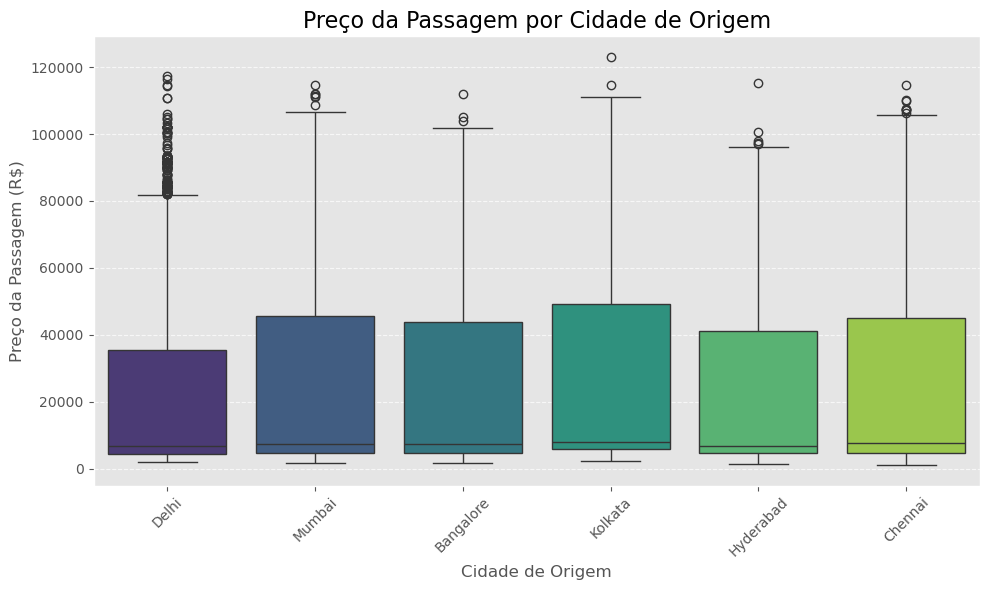


Média do preço por Cidade de Origem:
source_city
Chennai      21995.339871
Kolkata      21746.235679
Mumbai       21483.818839
Bangalore    21469.460575
Hyderabad    20155.623879
Delhi        18951.326639
Name: price, dtype: float64


In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='source_city', y='price', data=df, palette='viridis')
plt.title('Preço da Passagem por Cidade de Origem', fontsize=16)
plt.xlabel('Cidade de Origem', fontsize=12)
plt.ylabel('Preço da Passagem (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nMédia do preço por Cidade de Origem:")
print(df.groupby('source_city')['price'].mean().sort_values(ascending=False))

Célula 12: Preço vs. Cidade de Destino (destination_city)

C:\Users\Guilh\AppData\Local\Temp\ipykernel_17060\2669319804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='destination_city', y='price', data=df, palette='plasma')


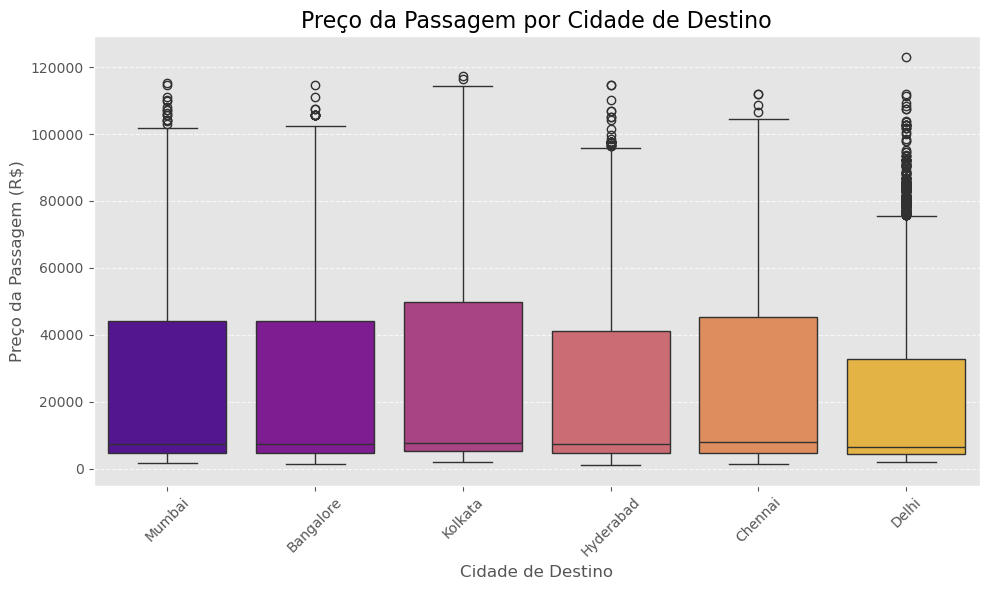


Média do preço por Cidade de Destino:
destination_city
Kolkata      21959.557556
Chennai      21953.323969
Bangalore    21593.955784
Mumbai       21372.529469
Hyderabad    20427.661284
Delhi        18436.767870
Name: price, dtype: float64


In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='destination_city', y='price', data=df, palette='plasma')
plt.title('Preço da Passagem por Cidade de Destino', fontsize=16)
plt.xlabel('Cidade de Destino', fontsize=12)
plt.ylabel('Preço da Passagem (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nMédia do preço por Cidade de Destino:")
print(df.groupby('destination_city')['price'].mean().sort_values(ascending=False))

E) Como varia o preço da passagem entre a classe econômica e a classe executiva?

Célula 13: Preço vs. Classe (class)

C:\Users\Guilh\AppData\Local\Temp\ipykernel_17060\3544790321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='price', data=df, palette='viridis')


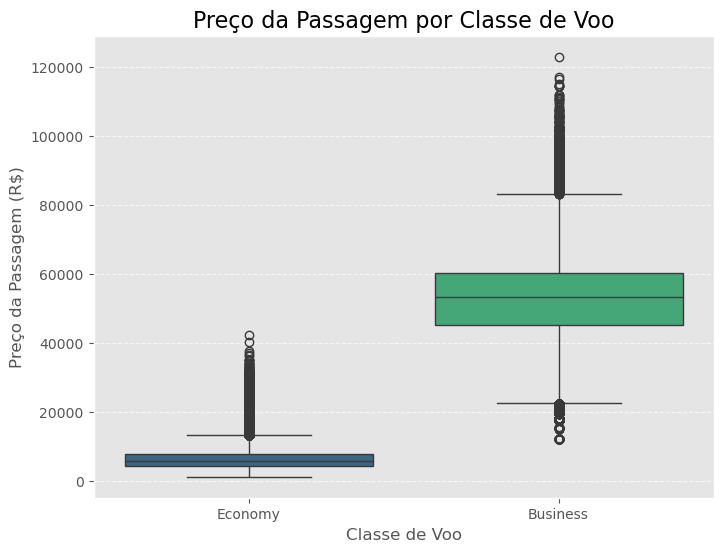


Média do preço por Classe de Voo:
class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

Mediana do preço por Classe de Voo:
class
Business    53164.0
Economy      5772.0
Name: price, dtype: float64


In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='price', data=df, palette='viridis')
plt.title('Preço da Passagem por Classe de Voo', fontsize=16)
plt.xlabel('Classe de Voo', fontsize=12)
plt.ylabel('Preço da Passagem (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nMédia do preço por Classe de Voo:")
print(df.groupby('class')['price'].mean().sort_values(ascending=False))

print("\nMediana do preço por Classe de Voo:")
print(df.groupby('class')['price'].median().sort_values(ascending=False))

## Etapa 3: Pré-processamento para Machine Learning e Engenharia de Atributos

Célula 14: Pré-processamento de Dados para Modelagem

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np # Para a transformação logarítmica

# Re-carregar o DataFrame para garantir que estamos partindo do df original limpo
try:
    df = pd.read_csv('Clean_Dataset.csv')
    df = df.drop('Unnamed: 0', axis=1)
    print("Dataset recarregado e coluna 'Unnamed: 0' removida.")
except FileNotFoundError:
    print("Erro: O arquivo 'Clean_Dataset.csv' não foi encontrado.")
    exit()

# 1. Transformação Logarítmica da Variável Alvo (Price)
# Adicionar um pequeno valor para evitar log(0) se houver, embora nosso preço mínimo seja 1107.
df['price_log'] = np.log1p(df['price']) # np.log1p(x) = log(1+x), é mais robusto para valores próximos de 0

# Separar Features (X) e Target (y)
# Agora usaremos 'price_log' como target
X = df.drop(['price', 'price_log'], axis=1) # Remove o price original e o log do X
y = df['price_log']                       # Usa o price transformado como target

print("\nShape de X (features):", X.shape)
print("Shape de y (target):", y.shape)

# 2. Identificar e Remover a coluna 'flight' para simplificar o modelo
if 'flight' in X.columns:
    X = X.drop('flight', axis=1)
    print("Coluna 'flight' removida de X para simplificação do modelo.")

# 3. Identificar colunas numéricas e categóricas
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include='object').columns

print("\nColunas numéricas:", list(numerical_cols))
print("Colunas categóricas (após remover 'flight'):", list(categorical_cols))


# 4. Aplicar One-Hot Encoding nas colunas categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)


# 5. Aplicar Escalonamento (StandardScaler) nas colunas numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols, index=X.index)

# 6. Combinar features numéricas escalonadas e categóricas encodadas
X_processed = pd.concat([X_scaled_df, X_encoded_df], axis=1)

print("\nShape de X após pré-processamento otimizado:", X_processed.shape)
print("\nPrimeiras 5 linhas de X_processed (features pré-processadas):")
print(X_processed.head())

# 7. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"\nDados de treino: {X_train.shape[0]} amostras")
print(f"Dados de teste: {X_test.shape[0]} amostras")
print(f"Número de features após pré-processamento otimizado: {X_train.shape[1]}")

Dataset recarregado e coluna 'Unnamed: 0' removida.

Shape de X (features): (300153, 10)
Shape de y (target): (300153,)
Coluna 'flight' removida de X para simplificação do modelo.

Colunas numéricas: ['duration', 'days_left']
Colunas categóricas (após remover 'flight'): ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

Shape de X após pré-processamento otimizado: (300153, 37)

Primeiras 5 linhas de X_processed (features pré-processadas):
   duration  days_left  airline_AirAsia  airline_Air_India  airline_GO_FIRST  \
0 -1.397531  -1.843875              0.0                0.0               0.0   
1 -1.375284  -1.843875              0.0                0.0               0.0   
2 -1.397531  -1.843875              1.0                0.0               0.0   
3 -1.386407  -1.843875              0.0                0.0               0.0   
4 -1.375284  -1.843875              0.0                0.0               0.0   

   airline_Indigo  airline_

## Etapa 4: Construção e Treinamento do Modelo de Machine Learning

Célula 15: Construir e Treinar o Modelo de Regressão Linear

Treinando o modelo de Regressão Linear...
Modelo treinado com sucesso!
Fazendo previsões no conjunto de teste...
Previsões realizadas!

Avaliação do Desempenho do Modelo:
Erro Médio Absoluto (MAE): R$ 0.25
Erro Quadrático Médio (MSE): R$ 0.10
Raiz do Erro Quadrático Médio (RMSE): R$ 0.32
R-quadrado (R2 Score): 0.9162


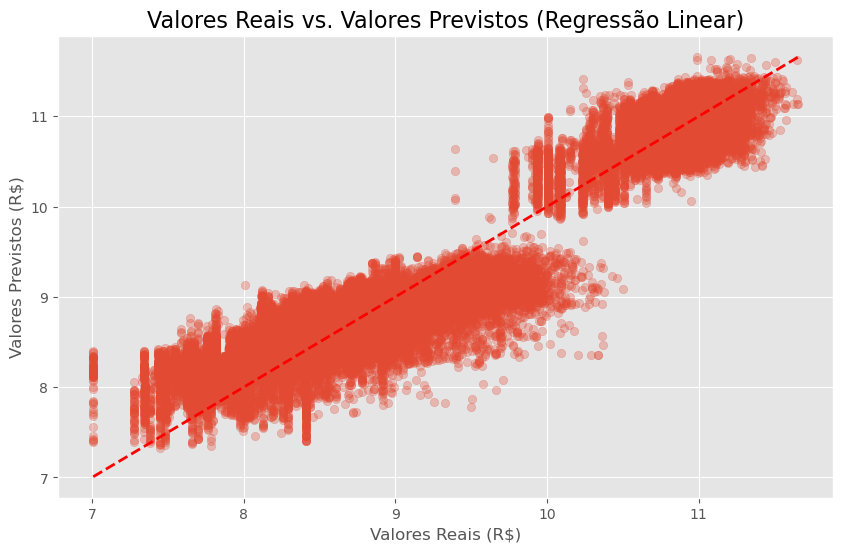

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Para calcular a raiz quadrada do MSE

# 1. Instanciar o modelo de Regressão Linear
model = LinearRegression()

# 2. Treinar o modelo com os dados de treino
print("Treinando o modelo de Regressão Linear...")
model.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

# 3. Fazer previsões no conjunto de teste
print("Fazendo previsões no conjunto de teste...")
y_pred = model.predict(X_test)
print("Previsões realizadas!")

# 4. Avaliar o desempenho do modelo
print("\nAvaliação do Desempenho do Modelo:")

# Mean Absolute Error (MAE) - Erro médio absoluto
# Representa a média das diferenças absolutas entre os valores previstos e os valores reais.
# É em unidades da variável alvo (R$).
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Médio Absoluto (MAE): R$ {mae:.2f}")

# Mean Squared Error (MSE) - Erro médio quadrático
# Penaliza erros maiores mais severamente. Também em unidades da variável alvo ao quadrado.
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): R$ {mse:.2f}")

# Root Mean Squared Error (RMSE) - Raiz do Erro Médio Quadrático
# É a raiz quadrada do MSE, retornando a métrica para a mesma unidade da variável alvo (R$).
rmse = np.sqrt(mse)
print(f"Raiz do Erro Quadrático Médio (RMSE): R$ {rmse:.2f}")

# R-squared (R2 Score) - Coeficiente de Determinação
# Indica a proporção da variância na variável dependente que é previsível a partir das variáveis independentes.
# Varia de 0 a 1 (ou pode ser negativo para modelos muito ruins). Quanto mais próximo de 1, melhor.
r2 = r2_score(y_test, y_pred)
print(f"R-quadrado (R2 Score): {r2:.4f}")

# Visualizar algumas previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Linha de 45 graus ideal
plt.xlabel("Valores Reais (R$)")
plt.ylabel("Valores Previstos (R$)")
plt.title("Valores Reais vs. Valores Previstos (Regressão Linear)", fontsize=16)
plt.grid(True)
plt.show()

## Etapa 5: Reverter a Previsão e Interpretar o Erro em Reais

Célula 16: Reverter Previsões e Avaliar em Escala Original

Avaliação do Desempenho do Modelo na Escala Original (Reais):
Erro Médio Absoluto (MAE) na Escala Original: R$ 4573.64
Raiz do Erro Quadrático Médio (RMSE) na Escala Original: R$ 7797.99


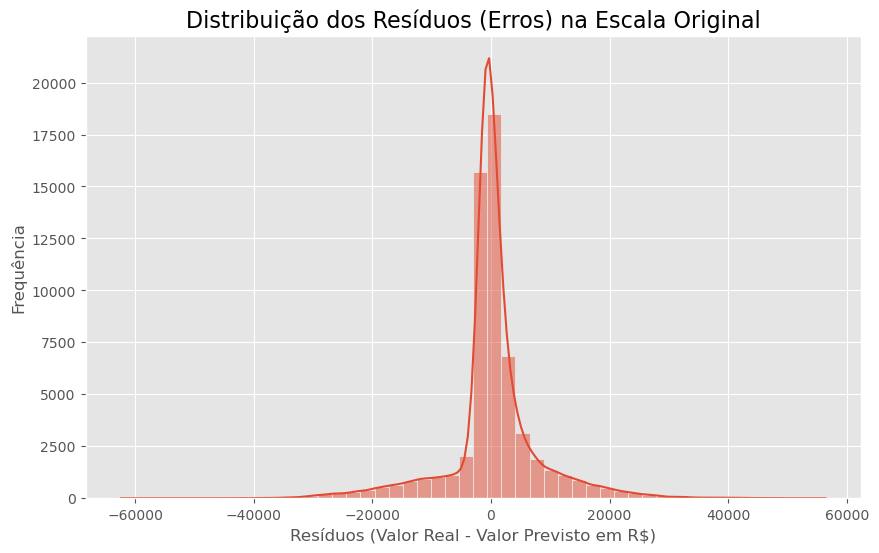

In [29]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reverter as previsões de 'price_log' para a escala original de 'price'
y_test_original = np.expm1(y_test) # np.expm1(x) é exp(x) - 1, o inverso de np.log1p(x)
y_pred_original = np.expm1(y_pred)

print("Avaliação do Desempenho do Modelo na Escala Original (Reais):")

# MAE na escala original
mae_original = mean_absolute_error(y_test_original, y_pred_original)
print(f"Erro Médio Absoluto (MAE) na Escala Original: R$ {mae_original:.2f}")

# RMSE na escala original
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Raiz do Erro Quadrático Médio (RMSE) na Escala Original: R$ {rmse_original:.2f}")

# Visualizar a distribuição dos erros na escala original
plt.figure(figsize=(10, 6))
sns.histplot(y_test_original - y_pred_original, kde=True, bins=50)
plt.title('Distribuição dos Resíduos (Erros) na Escala Original', fontsize=16)
plt.xlabel('Resíduos (Valor Real - Valor Previsto em R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()